In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Studia/SCGiE/data.csv')
prices = df.iloc[:, 3]

Mounted at /content/drive


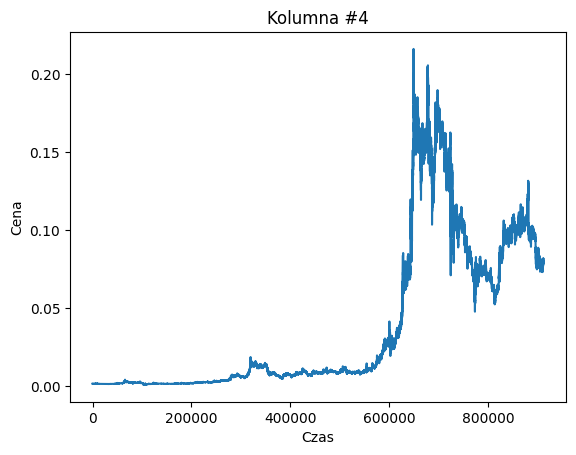

In [3]:
plt.plot(prices)
plt.title("Kolumna #4")
plt.xlabel("Czas")
plt.ylabel("Cena")
plt.show()

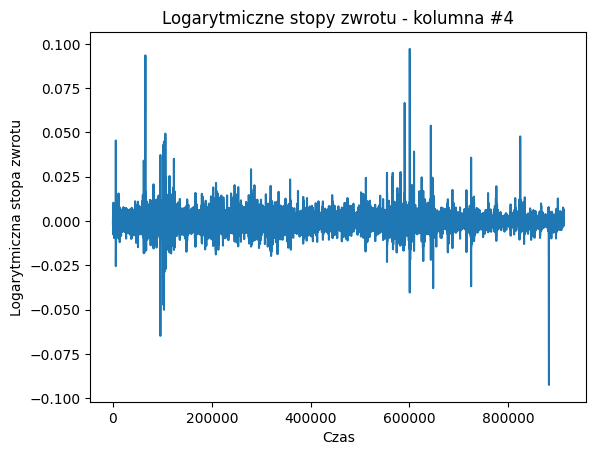

In [4]:
prices_log = np.log10(prices)

# Logarytmiczne stopy zwrotu
log_return_rates = np.diff(prices_log)

# Wykres
plt.plot(log_return_rates)
plt.title('Logarytmiczne stopy zwrotu - kolumna #4')
plt.ylabel('Logarytmiczna stopa zwrotu')
plt.xlabel('Czas')
plt.show()

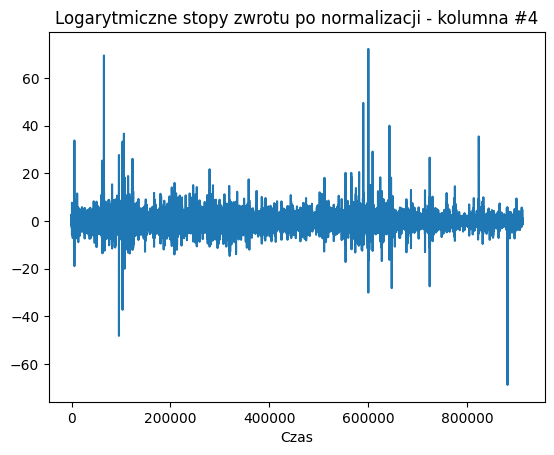

In [5]:
# Normalizacja
mean = np.mean(log_return_rates)
std = np.std(log_return_rates)
log_return_rates_norm = (log_return_rates - mean) / std

# Wykres
plt.plot(log_return_rates_norm)
plt.title('Kolumna #4')
plt.title('Logarytmiczne stopy zwrotu po normalizacji - kolumna #4')
plt.xlabel('Czas')
plt.show()

Skośność szumu białego: 0.00, Kurtoza: 0.01
Skośność stóp zwrotu: 0.80, Kurtoza: 141.76


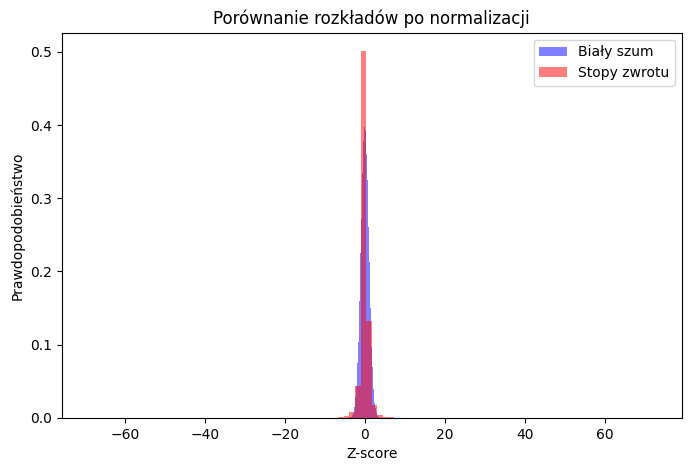

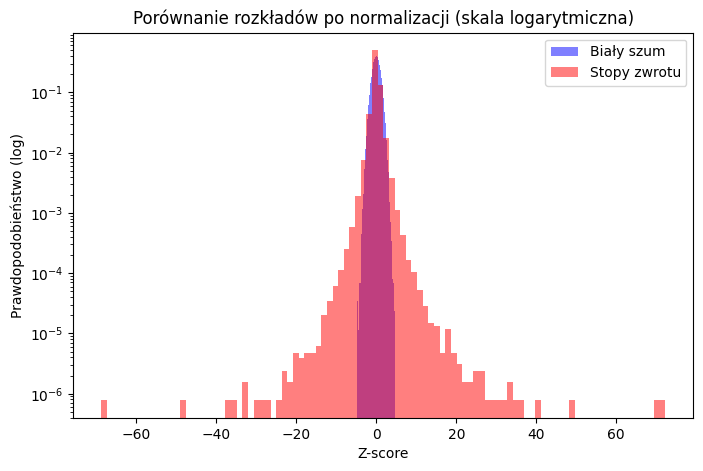

In [6]:
bins = 100  # Liczba przedziałów

white_noise = np.random.normal(0, 1, len(log_return_rates_norm))

hist_wn, bins_wn = np.histogram(white_noise, bins=bins, density=True)  # Histogram dla szumu białego
hist_sr, bins_sr = np.histogram(log_return_rates_norm, bins=bins, density=True)  # Histogram dla stóp zwrotu

# Obliczenie skośności i kurtozy
skew_wn, kurt_wn = stats.skew(white_noise), stats.kurtosis(white_noise)
skew_sr, kurt_sr = stats.skew(log_return_rates_norm), stats.kurtosis(log_return_rates_norm)

print(f"Skośność szumu białego: {skew_wn:.2f}, Kurtoza: {kurt_wn:.2f}")
print(f"Skośność stóp zwrotu: {skew_sr:.2f}, Kurtoza: {kurt_sr:.2f}")

# Wykres histogramów (z normalizacją)
plt.figure(figsize=(8, 5))
plt.hist(white_noise, bins=bins, density=True, alpha=0.5, label="Biały szum", color="blue")
plt.hist(log_return_rates_norm, bins=bins, density=True, alpha=0.5, label="Stopy zwrotu", color="red")
plt.title("Porównanie rozkładów po normalizacji")
plt.xlabel("Z-score")
plt.ylabel("Prawdopodobieństwo")
plt.legend()
plt.show()

# Wykres w skali logarytmicznej
plt.figure(figsize=(8, 5))
plt.hist(white_noise, bins=bins, density=True, alpha=0.5, label="Biały szum", color="blue")
plt.hist(log_return_rates_norm, bins=bins, density=True, alpha=0.5, label="Stopy zwrotu", color="red")
plt.yscale("log")
plt.title("Porównanie rozkładów po normalizacji (skala logarytmiczna)")
plt.xlabel("Z-score")
plt.ylabel("Prawdopodobieństwo (log)")
plt.legend()
plt.show()

In [7]:
# Wybór ogonów
left_tail = np.abs(log_return_rates_norm[log_return_rates_norm <= -1])
right_tail = log_return_rates_norm[log_return_rates_norm >= 1]
tail = np.concatenate((left_tail, right_tail))

# Histogram
bins = 50
hist, bin_edges = np.histogram(tail, bins=bins, density=True)
x_vals = (bin_edges[:-1] + bin_edges[1:]) / 2  # Środek binów

# Funkcja przeżycia
survival_function = 1 - np.cumsum(hist) / np.sum(hist)

# Filtracja niezerowych wartości przed logarytmowaniem
mask = (x_vals > 0) & (survival_function > 0)
x_vals = x_vals[mask]
survival_function = survival_function[mask]
x_vals = x_vals[:-1]
survival_function = survival_function[:-1]

# Logarytmowanie
x_vals_log = np.log10(x_vals)
survival_function_log = np.log10(survival_function)

# Kopia danych przed wyborem zakresu
x_vals_log_c = x_vals_log.copy()
survival_function_log_c = survival_function_log.copy()

# Wybór zakresu do dopasowania
fit_mask = (x_vals_log > 0.5) & (x_vals_log < 1.6)
x_fit = x_vals_log[fit_mask]
y_fit = survival_function_log[fit_mask]

# Dopasowanie prostej
slope, intercept = np.polyfit(x_fit, y_fit, 1)
fit_line = slope * x_fit + intercept

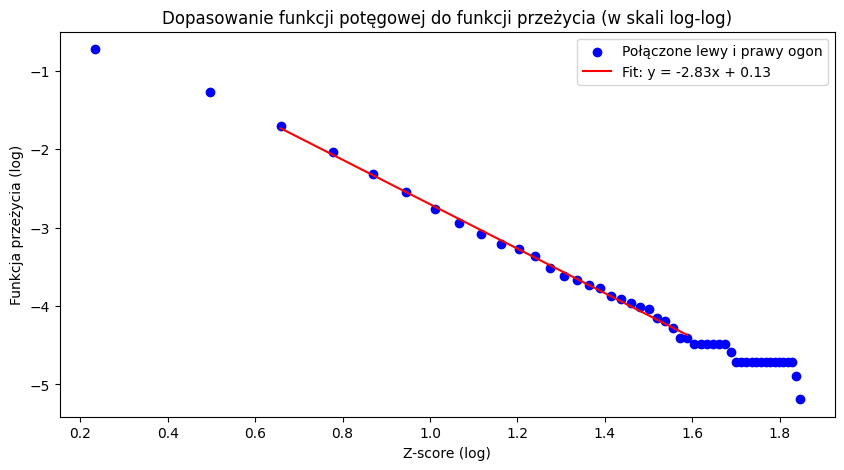

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(x_vals_log_c, survival_function_log_c, color="blue", label="Połączone lewy i prawy ogon")
plt.plot(x_fit, fit_line, color="red", label=f"Fit: y = {slope:.2f}x + {intercept:.2f}")
plt.legend()
plt.title("Dopasowanie funkcji potęgowej do funkcji przeżycia (w skali log-log)")
plt.xlabel("Z-score (log)")
plt.ylabel("Funkcja przeżycia (log)")
plt.show()

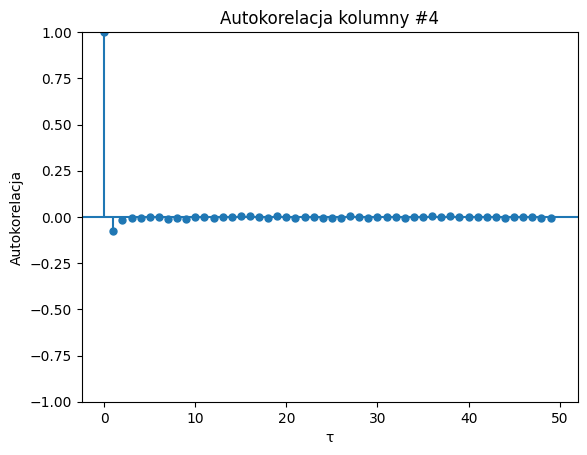

In [9]:
plot_acf(log_return_rates_norm, lags=np.arange(50))
plt.title('Autokorelacja kolumny #4')
plt.ylabel('Autokorelacja')
plt.xlabel('τ')
plt.show()

In [ ]:
plot_acf(np.abs(log_return_rates_norm), lags=np.arange(50))
plt.title('Autokorelacja kolumny #4')
plt.ylabel('Autokorelacja')
plt.xlabel('τ')
plt.show()

In [ ]:
# Obliczenie transformaty Fouriera
fft_white_noise = np.fft.fft(log_return_rates_norm)
fft_frequencies = np.fft.fftfreq(len(log_return_rates_norm), d=1)

fft_frequencies = np.fft.fftshift(fft_frequencies)
fft_white_noise = np.fft.fftshift(fft_white_noise)

# Wizualizacja widma mocy
plt.figure(figsize=(10, 5))
plt.plot(fft_frequencies, np.abs(fft_white_noise)**2, label="Widmo mocy")
plt.title('Widmo mocy dla danych giełdowych ANKR')
plt.ylabel('Moc (Kwadrat amplitudy)')
plt.xlabel('Częstotliwość [cykle/min]')
plt.yscale('log')
plt.xscale('log')
plt.ylim([1, 1e8])
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Obliczenie transformaty Fouriera
fft_white_noise = np.fft.fft(np.abs(log_return_rates_norm))
fft_frequencies = np.fft.fftfreq(len(log_return_rates_norm), d=1)

fft_frequencies = np.fft.fftshift(fft_frequencies)
fft_white_noise = np.fft.fftshift(fft_white_noise)

# Wizualizacja widma mocy
plt.figure(figsize=(10, 5))
plt.plot(fft_frequencies, np.abs(fft_white_noise)**2, label="Widmo mocy")
plt.title('Widmo mocy dla modułu danych giełdowych ANKR')
plt.ylabel('Moc (Kwadrat amplitudy)')
plt.xlabel('Częstotliwość [cykle/min]')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

In [ ]:
data_subset = df.iloc[:, :-3]

log_returns = np.log(df / df.shift(1))
log_returns.columns = [f"{col}" for col in data_subset.columns]

log_returns_normalized = (log_returns - log_returns.mean()) / log_returns.std()

correlation_matrix = log_returns_normalized.corr()